In [ ]:
# https://github.com/jihoo-kim/Data-Science-for-COVID-19/blob/master/dataset-detailed-description.ipynb

# 기본 설정

## 지도 한글 설정

In [ ]:
! pip uninstall -y datascience

In [ ]:
! pip uninstall -y branca

Uninstalling branca-0.4.1+3.g5887b9b:
  Successfully uninstalled branca-0.4.1+3.g5887b9b


In [ ]:
!pip install git+https://github.com/python-visualization/branca.git@master

  Cloning https://github.com/python-visualization/branca.git (to revision master) to /tmp/pip-req-build-15paxkur
  Running command git clone -q https://github.com/python-visualization/branca.git /tmp/pip-req-build-15paxkur
  Created wheel for branca: filename=branca-0.4.1+3.g5887b9b-cp36-none-any.whl size=24523 sha256=1e00db5c4c8ad64343d1c0014bbe9ad8d5714632207a70e6da66ccc1036fc3e2
  Stored in directory: /tmp/pip-ephem-wheel-cache-ntjryb6c/wheels/14/bc/41/d6078abe73beea93d98c014bba54c395224cabb54f95b9d248
Successfully built branca


## 그래프 관련 라이브러리 및 그래프 한글 설정

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
%config InlineBackend.figure_format = 'retina' #그래프의 글자를 선명하게 출력하도록 설정 
!apt -qq -y install fonts-nanum #나눔 글자체 설치 

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' #나눔고딕 글자체의 전체 경로 설정
font = fm.FontProperties(fname=fontpath, size=9) #글자체의 경로와 글자 크기 설정

In [ ]:
plt.style.use("ggplot") #ggplot 스타일을 사용하도록 설정

In [ ]:
plt.rc('font', family='NanumBarunGothic')  #폰트 이름 설정
mpl.font_manager._rebuild() #폰트 업데이트

## 구글 드라이브 연동

In [ ]:
from google.colab import drive
drive.mount("/gdrive")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
%ls /gdrive/My\ Drive/2020_ai_project1/data #구글 드라이브 폴더 조회(폴더 내 파일명 출력)

Case.csv          Policy.csv       SeoulFloating.csv  TimeGender.csv
PatientInfo.csv   Region.csv       TimeAge.csv        TimeProvince.csv
PatientRoute.csv  SearchTrend.csv  Time.csv           Weather.csv


## 라이브러리 추가 설치

In [ ]:
#날짜 데이터 처리를 위한 라이브러리
import datetime
import time

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import folium
import json

# 코로나 현황


In [ ]:
코로나_확진현황 = pd.read_csv("/gdrive/My Drive/2020_ai_project1/data/Time.csv") #시간대별 확진자 현황 데이터 파일 가져오기
코로나_확진현황_1 = 코로나_확진현황.groupby(by = "date").sum().reset_index() #"date"를 기준으로 groupby

In [ ]:
코로나_확진현황_1.columns #현재 데이터프레임의 컬럼명 조회

Index(['date', 'time', 'test', 'negative', 'confirmed', 'released',
       'deceased'],
      dtype='object')

In [ ]:
코로나_확진현황_1.drop(["time", "test", "negative"], axis = 1, inplace = True) #불필요한 컬럼 삭제

In [ ]:
코로나_확진현황_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       133 non-null    object
 1   confirmed  133 non-null    int64 
 2   released   133 non-null    int64 
 3   deceased   133 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 4.3+ KB


In [ ]:
코로나_확진현황_1["date"] = pd.to_datetime(코로나_확진현황_1["date"]) #object 타입인 데이터 > datetime 타입으로 변경

In [ ]:
코로나_확진현황_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       133 non-null    datetime64[ns]
 1   confirmed  133 non-null    int64         
 2   released   133 non-null    int64         
 3   deceased   133 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 4.3 KB


In [ ]:
코로나_확진현황_1.set_index("date", inplace = True) #"date" 컬럼을 인덱스로 지정

In [ ]:
코로나_확진현황_1.index

DatetimeIndex(['2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29',
               ...
               '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25',
               '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29',
               '2020-05-30', '2020-05-31'],
              dtype='datetime64[ns]', name='date', length=133, freq=None)

## 누적 확진자 현황

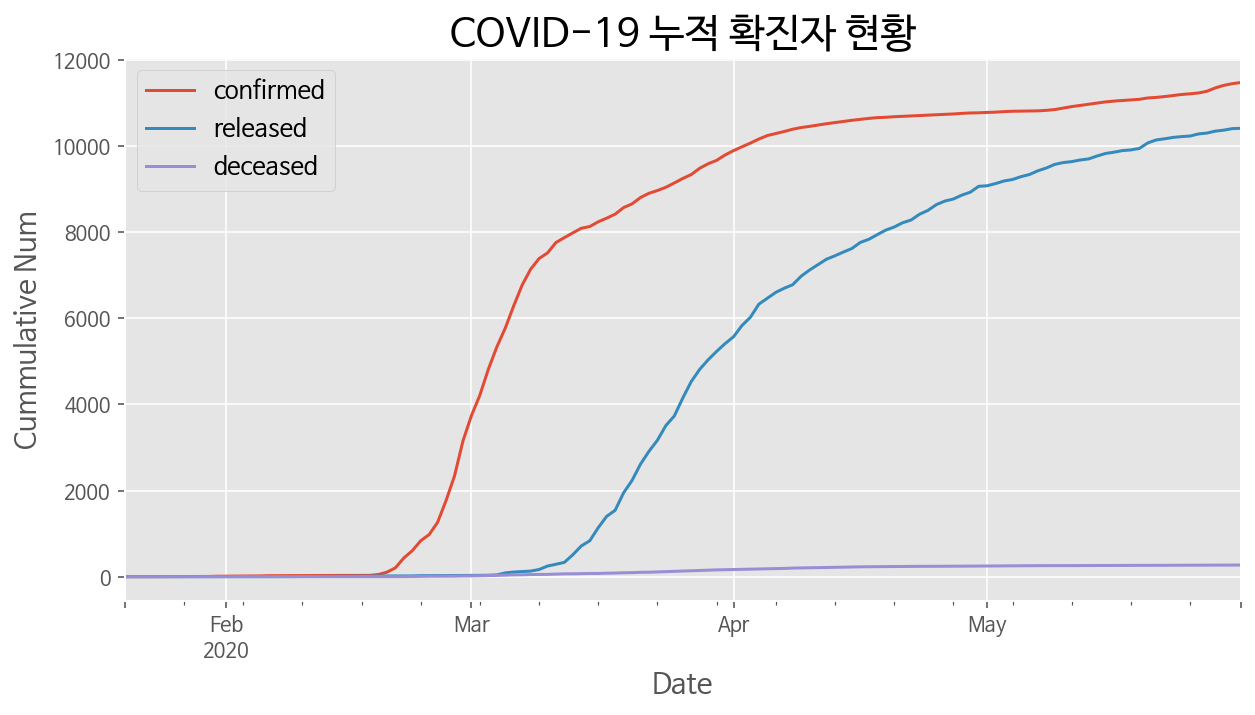

In [ ]:
코로나_확진현황_1.plot(kind = "line", figsize = (10, 5)) #, marker = "o" 옵션 추가 가능(이쁘게 표현하는 방법을 모르겠네요)

plt.title("COVID-19 누적 확진자 현황", fontsize = 20)
plt.ylabel('Cummulative Num', fontsize = 14)
plt.xlabel('Date', fontsize = 14)

plt.legend(fontsize = 12, loc = 'best')

##일별 현황

In [ ]:
코로나_확진현황_2 = 코로나_확진현황_1.copy()
확진자 = 코로나_확진현황_2['confirmed']

today = [1]

for i,j in enumerate(확진자) :
    if i >= 1 :
        one_day = j - 확진자[i-1]
        today.append(one_day)

완치자 = 코로나_확진현황_2['released']
today_1 = [0]
for i,j in enumerate(완치자) :
    if i >= 1 :
        one_day = j - 완치자[i-1]
        today_1.append(one_day)

사망자 = 코로나_확진현황_2['deceased']
today_2 = [0]
for i,j in enumerate(사망자) :
    if i >= 1 :
        one_day = j - 사망자[i-1]
        today_2.append(one_day)

코로나_확진현황_2['일 확진자'] = today
코로나_확진현황_2['일 완치자'] = today_1
코로나_확진현황_2['일 사망자'] = today_2

In [ ]:
코로나_확진현황_2

,confirmed,released,deceased,일 확진자,일 완치자,일 사망자
date,,,,,,
2020-01-20,1,0,0,1,0,0
2020-01-21,1,0,0,0,0,0
2020-01-22,1,0,0,0,0,0
2020-01-23,1,0,0,0,0,0
2020-01-24,2,0,0,1,0,0
...,...,...,...,...,...,...
2020-05-27,11265,10295,269,40,20,0
2020-05-28,11344,10340,269,79,45,0
2020-05-29,11402,10363,269,58,23,0


In [ ]:
코로나_확진현황_2_day = 코로나_확진현황_2[["일 확진자", "일 완치자", "일 사망자"]]

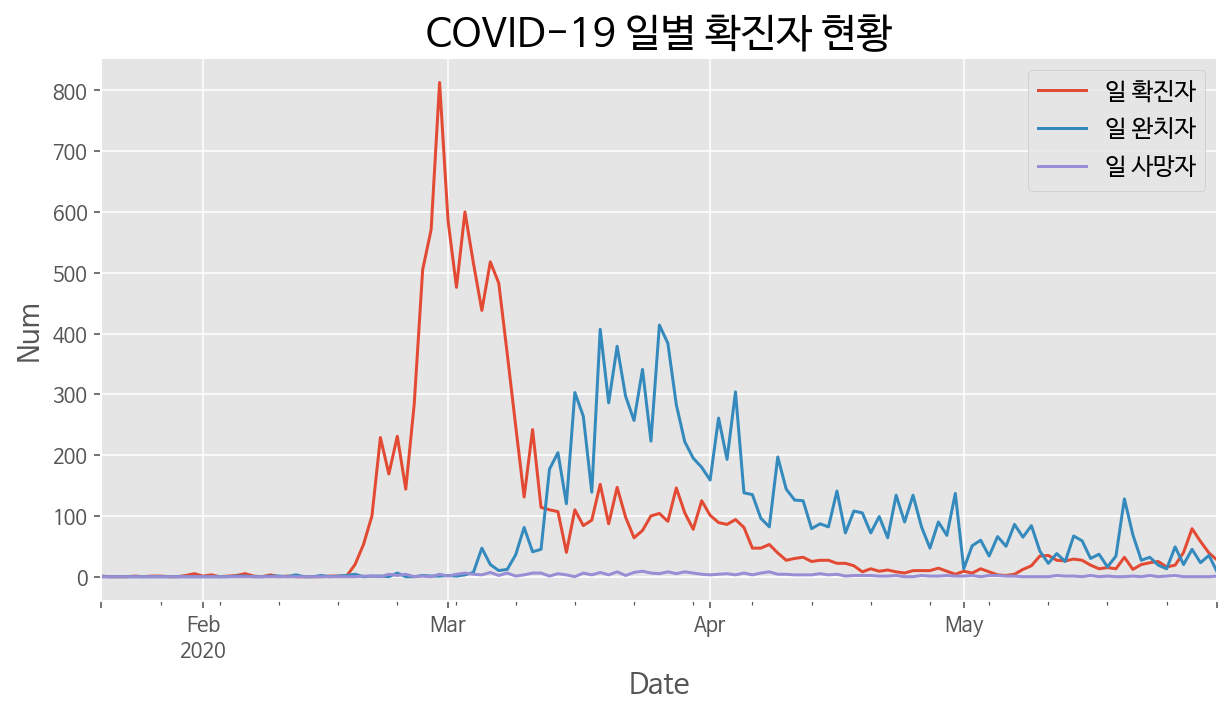

In [ ]:
코로나_확진현황_2_day.plot(kind = "line", figsize = (10, 5))

plt.title("COVID-19 일별 확진자 현황", fontsize = 20)
plt.ylabel('Num', fontsize = 14)
plt.xlabel('Date', fontsize = 14)

plt.legend(fontsize = 12, loc = 'best')

## 전날 대비 증감 추이

In [ ]:
코로나_확진현황_3 = 코로나_확진현황_2.copy()
코로나_확진현황_3['일별_코로나환자'] = 코로나_확진현황_2['confirmed']-코로나_확진현황_2['released']-코로나_확진현황_2['deceased']
일별_코로나환자 = 코로나_확진현황_3['일별_코로나환자']

전날대비_코로나환자 =[1]
for i,j in enumerate(일별_코로나환자) :
    if i >= 1 :
        increase = j - 일별_코로나환자[i-1]
        전날대비_코로나환자.append(increase)

코로나_확진현황_3['전날대비_코로나환자'] = 전날대비_코로나환자

In [ ]:
코로나_확진현황_3

,confirmed,released,deceased,일 확진자,일 완치자,일 사망자,일별_코로나환자,전날대비_코로나환자
date,,,,,,,,
2020-01-20,1,0,0,1,0,0,1,1
2020-01-21,1,0,0,0,0,0,1,0
2020-01-22,1,0,0,0,0,0,1,0
2020-01-23,1,0,0,0,0,0,1,0
2020-01-24,2,0,0,1,0,0,2,1
...,...,...,...,...,...,...,...,...
2020-05-27,11265,10295,269,40,20,0,701,20
2020-05-28,11344,10340,269,79,45,0,735,34
2020-05-29,11402,10363,269,58,23,0,770,35


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


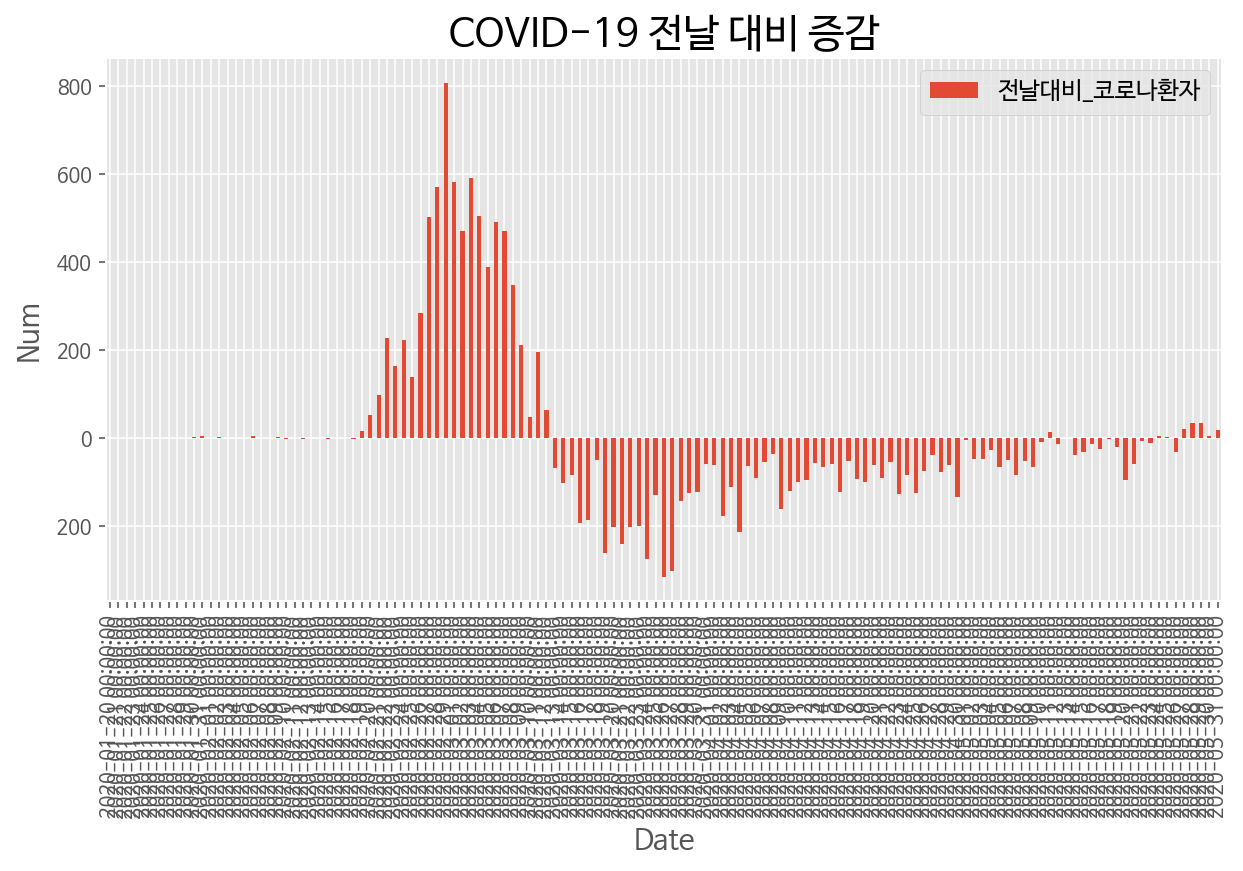

In [ ]:
코로나_확진현황_3["전날대비_코로나환자"].plot(kind = "bar", figsize = (10, 5))

plt.title("COVID-19 전날 대비 증감", fontsize = 20)
plt.ylabel('Num', fontsize = 14)
plt.xlabel('Date', fontsize = 14)

#x축 date 표현 변경하려 했으나 ... 실패 ..ㅎ... 
#plt.gca().xaxis.set_major_locator(mpl.dates.MonthLocator()) 
#plt.gca().xaxis.set_major_formatter(mpl.dates.DateFormatter("%Y-%m"))
#plt.gcf().autofmt_xdate()
#plt.margins(x=0, y=0)

plt.legend(fontsize = 12, loc = 'best')

## 국내 지역별 현황 



In [ ]:
loc = pd.read_csv('/gdrive/My Drive/2020_ai_project1/data/TimeProvince.csv')

In [ ]:
loc = loc[loc['date'] == '2020-05-31'] #가장 마지막(최근) 데이터만 가져옴
loc

,date,time,province,confirmed,released,deceased
2244,2020-05-31,0,Seoul,861,627,4
2245,2020-05-31,0,Busan,147,138,3
2246,2020-05-31,0,Daegu,6883,6607,185
2247,2020-05-31,0,Incheon,206,94,0
2248,2020-05-31,0,Gwangju,32,30,0
2249,2020-05-31,0,Daejeon,46,42,1
2250,2020-05-31,0,Ulsan,52,45,1
2251,2020-05-31,0,Sejong,47,47,0
2252,2020-05-31,0,Gyeonggi-do,840,650,19
2253,2020-05-31,0,Gangwon-do,57,50,3


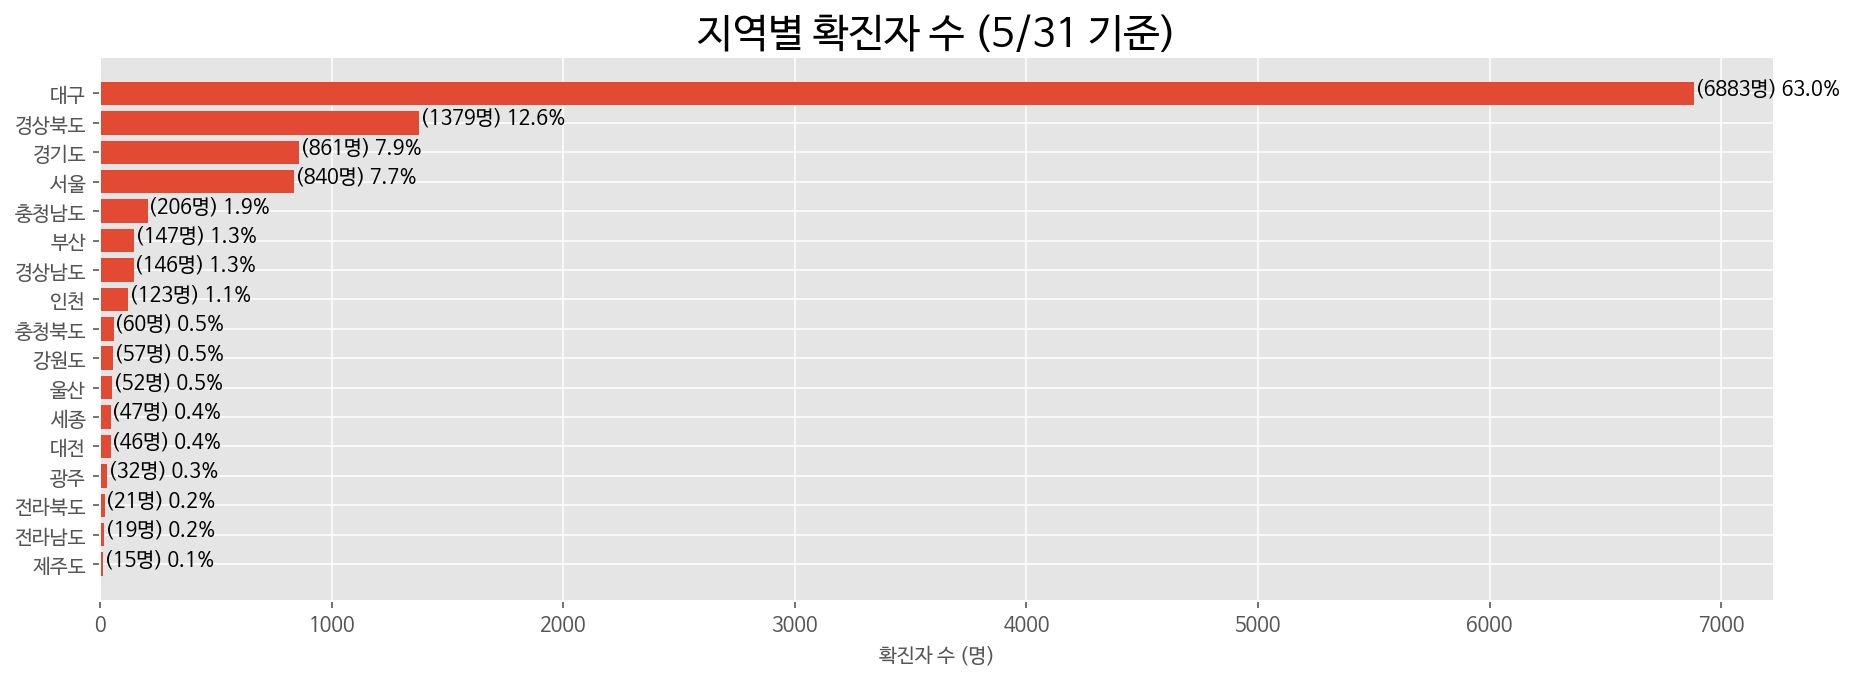

In [ ]:
loc_sort = sorted(list(zip(loc['province'],loc['confirmed'])),key=(lambda x:x[1]))
index_loc = [ x[0] for x in loc_sort]
values_loc = [ y[1] for y in loc_sort]

korean = ['제주도','전라남도','전라북도','광주','대전','세종','울산','강원도','충청북도','인천','경상남도','부산','충청남도','서울','경기도','경상북도','대구']
plt.figure(figsize = (15,5))

X = np.arange(len(korean))
plt.barh(X, values_loc, tick_label = korean)
plt.title('지역별 확진자 수 (5/31 기준)', fontsize = 20)
plt.xlabel('확진자 수 (명)', fontsize = 10)
plt.yticks(fontsize = 10)

vvv=[] ; totalloc = sum(values_loc)
for i in range(len(values_loc)):
    vvv.append(values_loc[i]/totalloc*100)


for x,y in enumerate(X):
    datall = "(%d명)"%values_loc[x] + " %.1f"%vvv[x] + "%"
    plt.text(values_loc[x]+3, y, datall, fontsize = 10)

plt.show()

In [ ]:
loc_sort

[('Jeju-do', 15),
 ('Jeollanam-do', 19),
 ('Jeollabuk-do', 21),
 ('Gwangju', 32),
 ('Daejeon', 46),
 ('Sejong', 47),
 ('Ulsan', 52),
 ('Gangwon-do', 57),
 ('Chungcheongbuk-do', 60),
 ('Gyeongsangnam-do', 123),
 ('Chungcheongnam-do', 146),
 ('Busan', 147),
 ('Incheon', 206),
 ('Gyeonggi-do', 840),
 ('Seoul', 861),
 ('Gyeongsangbuk-do', 1379),
 ('Daegu', 6883)]

In [ ]:
시도_현황 = pd.DataFrame(loc_sort, columns = ["시도", "확진자 현황"])

In [ ]:
시도_현황.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      17 non-null     object
 1   확진자 현황  17 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes


### 지도 시각화

In [1]:
geo = json.load(open("/gdrive/My Drive/2020_ai_project1/data/.json"))

NameError: ignored

In [2]:
geo

NameError: ignored

In [ ]:
g_map= folium.Map(
    location = [37.5502, 126.982], #종로의 위도/경도
    tiles = "Stamen Terrain",
    zoom_start = 10
)

folium.Choropleth(
    data = 시도_현황, #데이터 프레임
    columns = ["시도", "확진자 현황"], #지도에 출력하고 싶은 칸의 이름, 값
    fill_color = "YlOrRd", #색: 노랑 > 주황 > 빨강
    geo_data = geo,
    key_on = "feature.properties.CTP_ENG_NM",
    legend_name = "확진자 현황"
).add_to(g_map)

g_map